# A Real-Time Siren Detector to improve Safety of Guide in Traffic Environment

In [1]:
import numpy as np
import IPython.display as ipd

import librosa
import librosa.display

import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')

import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
file = 'data/3.wav'
y, sr = librosa.load(file, sr=8000)
ipd.Audio(file)

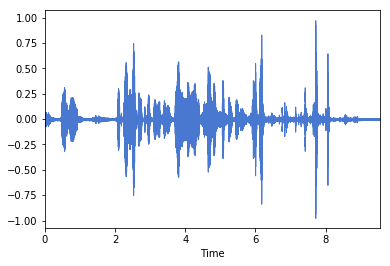

In [3]:
librosa.display.waveplot(y=y, sr=sr)

In [4]:
def camdf(y,sr,tau,N):
    D = 0.0
    for n in range(N):
        D += abs(y[(n+tau)%N] - y[n])
    return D

In [5]:
camdf_list = []
N = len(y[:513])
for i in range(512):
     camdf_list.append(camdf(y=y,sr=sr,tau=i,N=N))

/Users/petrsemenov/.virtualenv/robofinist/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


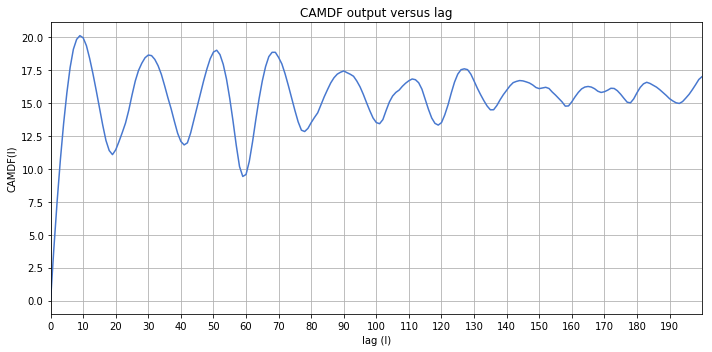

In [6]:
plt.figure(figsize=(10,5))
plt.plot(camdf_list)
plt.title('CAMDF output versus lag')
plt.xlabel('lag (l)')
plt.xlim([0,200])
plt.ylabel('CAMDF(l)')
plt.grid('on')
plt.xticks(np.arange(0, 200, 10.0))
plt.tight_layout()

In [7]:
interval = camdf_list[4:100]
min_D = min(interval)
pitch_detected = round(sr/(interval.index(min_D)+4),2)
print("Detected Pitch: {} Hz".format(pitch_detected))

Detected Pitch: 135.59 Hz


### Probability of the presence of a siren

In [8]:
N = len(y[:513])
pitch_list = []
for i in range(30):
    camdf_list = []
    y_clip = y[256*i:256*i+512+1]
    for i in range(512):
        camdf_list.append(camdf(y=y_clip,sr=sr,tau=i,N=N))
    interval = camdf_list[4:100]
    min_D = min(interval)
    pitch_detected = round(sr/(interval.index(min_D)+4),2)
    pitch_list.append(pitch_detected)

/Users/petrsemenov/.virtualenv/robofinist/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


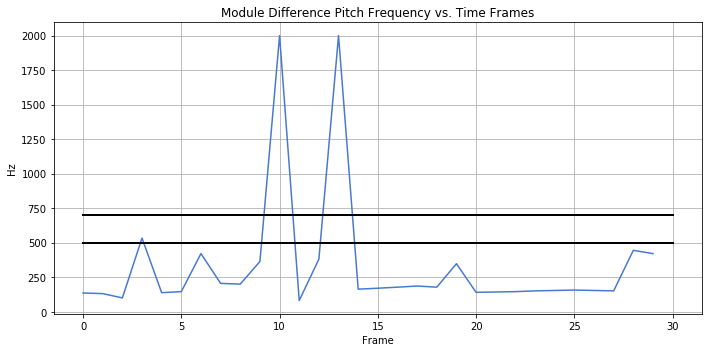

In [9]:
plt.figure(figsize=(10,5))
plt.plot(pitch_list)
plt.title('Module Difference Pitch Frequency vs. Time Frames')
plt.xlabel('Frame')
plt.ylabel('Hz')
plt.grid('on')
plt.plot([0, 30], [500, 500], 'k-', lw=2)
plt.plot([0, 30], [700, 700], 'k-', lw=2)

plt.tight_layout()